<a href="https://colab.research.google.com/github/fridaruh/exp_usuario_pln/blob/master/extract_API_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
consumer_key = 'clave_consum'
consumer_secret = 'sdasd'
access_token = 'asdasd'
access_token_secret = 'asdasd'

In [2]:
import tweepy
import pandas as pd

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

In [6]:
twitter_users = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search, q='black friday', count= 1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'es':
      twitter_users.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

      print([tweet.user.name,tweet.created_at,tweet.text])

['Marc', datetime.datetime(2021, 11, 24, 19, 16, 19), 'Ah, que el que compres en black friday t’ho cobren, mala estafa']
['rodríguez🇪🇸', datetime.datetime(2021, 11, 24, 19, 16, 19), 'estoy con 70€ menos y solo llevamos 15 minutos de black friday, gracias scalpers https://t.co/0QTVaPLvvL']
['Ajuntament de Sueca', datetime.datetime(2021, 11, 24, 19, 16), '💉 Punto de vacunación masiva sin cita previa en Ikea de Alfafar aprovechando el Black Friday\n💉 Viernes 26, de 15 a… https://t.co/6J4zquo4Qy']
['Ocio Central', datetime.datetime(2021, 11, 24, 19, 15, 58), '⬛◼️◾BLACK FRIDAY◾◼️⬛\n\n🛒Sólo en tienda física\n26 y 27 de noviembre 📅\n\n✅ -10% descuento en todos los juegos de mesa… https://t.co/UKbaplmB8Q']
['Francis', datetime.datetime(2021, 11, 24, 19, 15, 55), '@SantiRosell Eso decía yo. Pero como está el Black Friday ahí, a las puertas… yo que se… 😆😆😆😆']
['Planet Events', datetime.datetime(2021, 11, 24, 19, 15, 40), '¡Muy atentos el viernes a las 10:00 h, porque nos unimos al Black Friday!🙌

Ejemplo cambiando parámetros:

In [14]:
twitter_users_2 = []
tweet_time_2 = []
tweet_string_2 = []

for tweet in tweepy.Cursor(api.search, q='black friday', count= 1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'en':
      twitter_users_2.append(tweet.user.name)
      tweet_time_2.append(tweet.created_at)
      tweet_string_2.append(tweet.text)

      print([tweet.user.name,tweet.created_at,tweet.text])

['G J 🍒', datetime.datetime(2021, 11, 24, 19, 26, 19), 'the @small_exchange holiday hours\n\nTurkey Day .  CLOSED\n\nBlack Friday .  7am - 12pm  #tomsosnoff time (chicago) https://t.co/plAXYQWY56']
['365 DNI', datetime.datetime(2021, 11, 24, 19, 26, 18), 'This Black Friday I’ll buy myself a new charger!! iPhone users, how ugly is your charger?😂😂 \n\nLet’s be honest😆']
['Champions League Volley', datetime.datetime(2021, 11, 24, 19, 26, 18), '🇮🇹 @ImocoVolley might have lost this rally, but what a save by @miriamsylla17 👀!⤵️\n\n💥📺 BLACK FRIDAY deal on… https://t.co/yniPyFlBzq']
['Emre', datetime.datetime(2021, 11, 24, 19, 26, 18), '@ShaneCarwin @SharkOutlawS @LazyLionsNFT @noncoducks @humarsNFT @richapeworld 📢Big Announcement📢\n🔥Black Friday Aird… https://t.co/MJIBHZ3suA']
['scorp🦂💋', datetime.datetime(2021, 11, 24, 19, 26, 16), 'Dias normais: 2000\n\nBlack friday: 1999']
['Lost In Cult', datetime.datetime(2021, 11, 24, 19, 26, 16), '🚨BLACK FRIDAY ALERT🚨\n\nHave we got a deal for you! Unt

In [7]:
df = pd.DataFrame({'name':twitter_users, 'time':tweet_time, 'tweet':tweet_string })

Exportamos el dataframe a un archivo csv

In [8]:
df.to_csv('tweets_black_friday.csv')

En caso de que no tengas acceso a la API, tendrás que ejecutar esta celda donde importas el archivo csv

In [ ]:
#df = pd.read_csv('/content/tweets_black_friday.csv')

In [9]:
df.head()

,name,time,tweet
0,Marc,2021-11-24 19:16:19,"Ah, que el que compres en black friday t’ho co..."
1,rodríguez🇪🇸,2021-11-24 19:16:19,estoy con 70€ menos y solo llevamos 15 minutos...
2,Ajuntament de Sueca,2021-11-24 19:16:00,💉 Punto de vacunación masiva sin cita previa e...
3,Ocio Central,2021-11-24 19:15:58,⬛◼️◾BLACK FRIDAY◾◼️⬛\n\n🛒Sólo en tienda física...
4,Francis,2021-11-24 19:15:55,@SantiRosell Eso decía yo. Pero como está el B...


Convierto los tweets a listas

In [10]:
data = df['tweet'].to_list()

In [12]:
#data

In [13]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [15]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
texto = []

for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  texto.append(token_2)

In [18]:
#texto es una lista de listas 

In [22]:
texto

[['ah',
  ',',
  'que',
  'el',
  'que',
  'compres',
  'en',
  'black',
  'friday',
  't',
  'ho',
  'cobren',
  ',',
  'mala',
  'estafa'],
 ['estoy',
  'con',
  '70',
  'menos',
  'y',
  'solo',
  'llevamos',
  '15',
  'minutos',
  'de',
  'black',
  'friday',
  ',',
  'gracias',
  'scalpers',
  'https',
  ':',
  't',
  '.',
  'co',
  '0qtvaplvvl'],
 ['punto',
  'de',
  'vacunación',
  'masiva',
  'sin',
  'cita',
  'previa',
  'en',
  'ikea',
  'de',
  'alfafar',
  'aprovechando',
  'el',
  'black',
  'friday',
  'viernes',
  '26',
  ',',
  'de',
  '15',
  'a',
  'https',
  ':',
  't',
  '.',
  'co',
  '6j4zquo4qy'],
 ['black',
  'friday',
  'sólo',
  'en',
  'tienda',
  'física',
  '26',
  'y',
  '27',
  'de',
  'noviembre',
  '10',
  'descuento',
  'en',
  'todos',
  'los',
  'juegos',
  'de',
  'mesa',
  'https',
  ':',
  't',
  '.',
  'co',
  'ukbaplmb8q'],
 ['@',
  'santirosell',
  'eso',
  'decía',
  'yo',
  '.',
  'pero',
  'como',
  'está',
  'el',
  'black',
  'friday',
  

In [19]:
flatten = [w for l in texto for w in l]

In [26]:
import string
puntuacion = list(string.punctuation)

In [21]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [27]:
puntuacion.append('https')
puntuacion.append('co')
puntuacion.append('t')

In [28]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'https',
 'co',
 't']

In [29]:
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
df_2 = [w for w in flatten if w not in stop_words_n]

In [31]:
df_3 = [w for w in df_2 if w not in puntuacion]

In [32]:
freq_words = nltk.FreqDist(df_3)

In [33]:
freq_words.most_common(15)

[('black', 28),
 ('friday', 28),
 ('semana', 5),
 ('descuento', 4),
 ('2021', 4),
 ('ofertas', 4),
 ('hogar', 4),
 ('menos', 3),
 ('viernes', 3),
 ('10', 3),
 ('si', 3),
 ('monta', 3),
 ('conectado', 3),
 ('completo', 3),
 ('compatible', 3)]

In [34]:
omitir_palabras = ['black','friday','2021','ofertas','semana']

In [35]:
df_4 =  [w for w in df_3 if w not in omitir_palabras]

In [36]:
freq_words = nltk.FreqDist(df_4)

In [37]:
freq_words.most_common(15)

[('descuento', 4),
 ('hogar', 4),
 ('menos', 3),
 ('viernes', 3),
 ('10', 3),
 ('si', 3),
 ('monta', 3),
 ('conectado', 3),
 ('completo', 3),
 ('compatible', 3),
 ('apple', 3),
 ('homekit', 3),
 ('15', 2),
 ('26', 2),
 ('27', 2)]

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

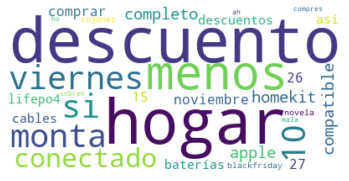

In [39]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
!pip install stylecloud

     |████████████████████████████████| 262 kB 33.8 MB/s 
     |████████████████████████████████| 161 kB 64.5 MB/s 
     |████████████████████████████████| 87 kB 6.5 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=cbefc197c51961364e1cf39b27a854f2797af32dbfa80c7fc828a595c065d6e9
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=e12b142822d7c84264ef53f9f67d4e49c5f51849dcc9cd0dbda4ab69596b4b7c
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=6348d395113d0decbbb871c7b2fcb37396a3ab976e9a57afaefd32a6d45a24dd
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f97

In [42]:
import stylecloud

In [43]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [62]:
my_mask = np.array(Image.open('/content/apple.png'))

In [63]:
wc = WordCloud(background_color='white',
               mask=my_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black')

Revisamos el tipo de dato de df_4

In [56]:
type(df_4)

list

Lo convertimos a string para pasarlo por la funcion de stylecloud

In [57]:
texto_analisis = str(df_4)

Generamos la nube de palabras:

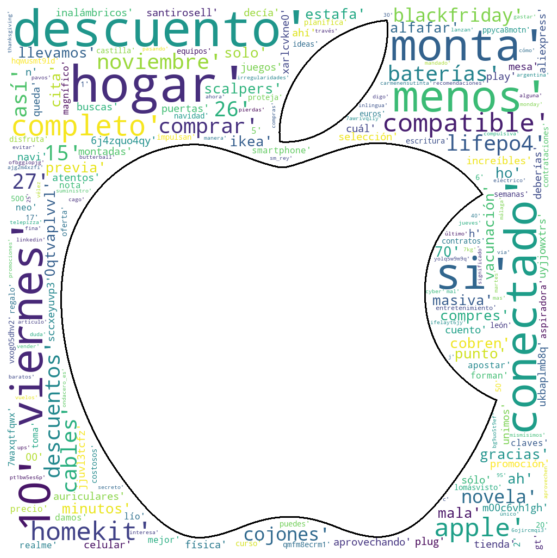

In [64]:
wc.generate(texto_analisis)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()